In [ ]:
# ÂÆâË£ù OpenOCR ËàáÂøÖË¶ÅÂ•ó‰ª∂
!pip install numpy==1.24.4 openocr-python onnxruntime --force-reinstall

# Âª∫Á´ãÊ®°ÂûãË≥áÊñôÂ§æ
!mkdir -p /content/models

# ‰∏ãËºâÊ™¢Ê∏¨ËàáËæ®Ë≠òÊ®°Âûã
# !wget -nc -O /content/models/openocr_det_model.onnx https://github.com/Topdu/OpenOCR/releases/download/v1.0/openocr_det_model.onnx
# !wget -nc -O /content/models/openocr_rec_model.onnx https://github.com/Topdu/OpenOCR/releases/download/v1.0/openocr_rec_model.onnx


  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached openocr_python-0.0.9-py3-none-any.whl.metadata (4.4 kB)
  Using cached onnxruntime-1.21.1-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (4.5 kB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached rapidfuzz-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached lmdb-1.6.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
  Using cached imgaug-0.4.0-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached pyclipper-1.3.0.post6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.0 kB)
  Using cached coloredlogs-15.0.1-py2.py3-

In [ ]:
# ÈÄ£Áµêgoogle drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ÂàùÂßãÂåñ OpenOCR ÂºïÊìé
from openocr import OpenOCR
ocr_engine = OpenOCR(backend='onnx', device='cpu')

[2025/04/21 08:02:20] openrec INFO: Model not found. Downloading from https://github.com/Topdu/OpenOCR/releases/download/develop0.0.1/openocr_det_model.onnx...
[2025/04/21 08:02:22] openrec INFO: Model downloaded and saved at: /root/.cache/openocr/openocr_det_model.onnx
[2025/04/21 08:02:22] openrec INFO: Model not found. Downloading from https://github.com/Topdu/OpenOCR/releases/download/develop0.0.1/openocr_rec_model.onnx...
[2025/04/21 08:02:24] openrec INFO: Model downloaded and saved at: /root/.cache/openocr/openocr_rec_model.onnx


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
# Ëó•Áâ©ÁÖßÁâáËº∏ÂÖ•ÂèäËº∏Âá∫‰ΩçÁΩÆ
ori = '/content/drive/MyDrive/Áï¢Ê•≠Â∞àÈ°å/drug_photo/IMG_7031.jpg'
rem_ori = '/content/drive/MyDrive/Áï¢Ê•≠Â∞àÈ°å/drug_photo/IMG_7031.jpg'
input_img = cv2.imread(ori)
cv2_imshow(input_img)

AttributeError: 'NoneType' object has no attribute 'clip'

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 176M/176M [00:00<00:00, 161GB/s]


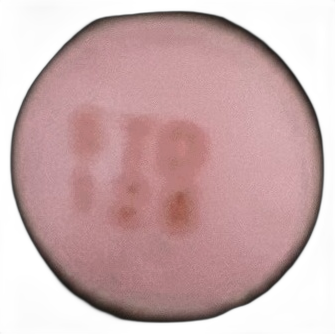

In [ ]:
# Step 1: ÈÄ≤Ë°åÂéªËÉå
!pip install rembg
from rembg import remove
import numpy as np

# Read the image and remove the background
input_img = cv2.imread(ori)
rembg_img = remove(input_img)

# Check if the image has an alpha channel (transparency)
if rembg_img.shape[2] == 4:
    alpha_channel = rembg_img[:, :, 3]

    # Apply slight blur to reduce noise in the alpha channel
    alpha_channel = cv2.GaussianBlur(alpha_channel, (5, 5), 0)

    # Create a mask where pixels are not transparent (alpha > threshold)
    _, mask = cv2.threshold(alpha_channel, 50, 255, cv2.THRESH_BINARY)

    # Find contours of non-transparent areas
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the bounding box for the largest contour (or union of top contours)
    if contours:
        # Sort contours by area and keep the largest one
        contours = sorted(contours, key=cv2.contourArea, reverse=True)

        # Use the largest contour for bounding box calculation
        x, y, w, h = cv2.boundingRect(contours[0])

        # Add margin to ensure we don‚Äôt crop out the imprint
        margin = 10
        x = max(0, x - margin)
        y = max(0, y - margin)
        w = min(rembg_img.shape[1] - x, w + 2 * margin)
        h = min(rembg_img.shape[0] - y, h + 2 * margin)

        # Crop the image to this bounding box with margin
        cropped_img = rembg_img[y:y+h, x:x+w]


        # Save the cropped image
        cv2.imwrite(rem_ori, cropped_img)

        # Display the cropped image
        cv2_imshow(cropped_img)
    else:
        print("No non-transparent regions found.")
else:
    print("The image does not have an alpha channel.")



üì∑ ËôïÁêÜÂæåÂΩ±ÂÉèÈ†êË¶ΩÔºö
ÂéüÂúñ


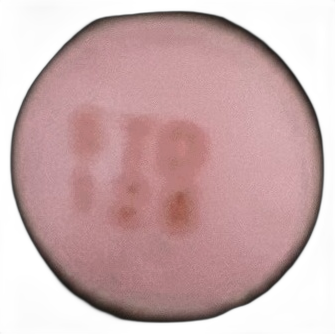

Â¢ûÂº∑1


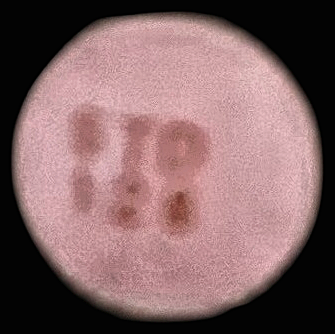

ÂéªÈ£ΩÂíå1


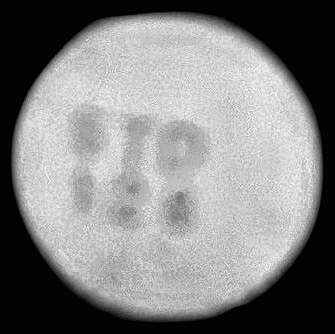

Â¢ûÂº∑2


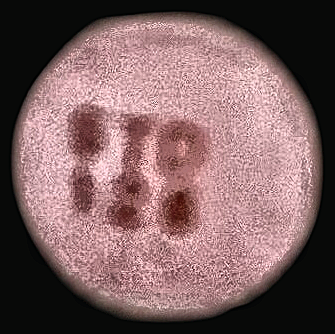

ÂéªÈ£ΩÂíå2


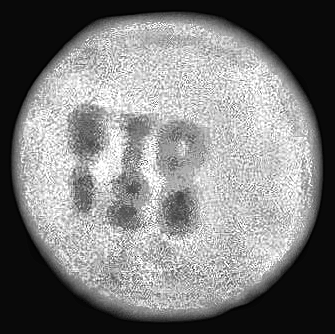

Ê®°Á≥äÂÑ™Âåñ


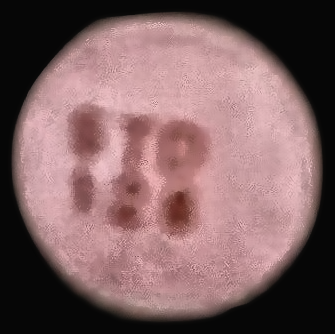

[2025/04/11 11:33:05] openrec INFO: Processing 1/1: /content/temp_ÂéüÂúñ.jpg
[2025/04/11 11:33:05] openrec INFO: No text detected.
[2025/04/11 11:33:05] openrec INFO: No text detected.
[ÂéüÂúñ] ‚ùå Ê≤íÊúâÂÅµÊ∏¨Âà∞ÊñáÂ≠ó
[2025/04/11 11:33:05] openrec INFO: Processing 1/1: /content/temp_Â¢ûÂº∑1.jpg
[2025/04/11 11:33:05] openrec INFO: Results: [{'transcription': '119', 'points': [[63, 90], [219, 102], [210, 212], [54, 199]], 'score': 0.5048033595085144}].
[2025/04/11 11:33:05] openrec INFO: Time cost: {'time_cost': 0.3038020133972168, 'detection_time': 0.11479973793029785, 'recognition_time': 0.18900227546691895, 'avg_rec_time_cost': 0.18752026557922363}.
[2025/04/11 11:33:05] openrec INFO: Results saved to e2e_results/system_results.txt.
[Â¢ûÂº∑1] ‚úÖ Ëæ®Ë≠òÔºö['119']ÔºåÂπ≥Âùá‰ø°ÂøÉÔºö0.505
[2025/04/11 11:33:05] openrec INFO: Processing 1/1: /content/temp_ÂéªÈ£ΩÂíå1.jpg
[2025/04/11 11:33:06] openrec INFO: No text detected.
[2025/04/11 11:33:06] openrec INFO: No text detected.
[ÂéªÈ£ΩÂíå1

In [ ]:
import json, re, cv2
import numpy as np
from google.colab.patches import cv2_imshow

processed_bounds = []

def enhance_contrast(img, clip_limit, alpha, beta):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    merged = cv2.merge((cl, a, b))
    enhance_img = cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)
    blurred = cv2.GaussianBlur(enhance_img, (5, 5), 3.0)
    return cv2.addWeighted(enhance_img, alpha, blurred, beta, 0)

def desaturate_image(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    s.fill(0)
    return cv2.cvtColor(cv2.merge([h, s, v]), cv2.COLOR_HSV2BGR)

def enhance_for_blur(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.5, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    enhanced_lab = cv2.merge((cl, a, b))
    contrast_img = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)
    blurred = cv2.GaussianBlur(contrast_img, (3, 3), 1.0)
    sharpened = cv2.addWeighted(contrast_img, 1.8, blurred, -0.8, 0)
    final = cv2.bilateralFilter(sharpened, d=9, sigmaColor=75, sigmaSpace=75)
    return final

def extract_texts_from_openocr_result(ocr_result_str, min_score=0.8):
    result_json = json.loads(ocr_result_str[0].split('\t')[1])
    extracted = []
    for item in result_json:
        score = item.get("score", 1.0)
        if score < min_score:
            continue
        text = item['transcription'].strip().upper()
        text = re.sub(r'[^A-Z0-9\\-]', '', text)
        if text:
            extracted.append(text)
    return extracted

def recognize_with_openocr(img, name="default", min_score=0.8):
    temp_path = f"/content/temp_{name}.jpg"
    cv2.imwrite(temp_path, img)
    result, elapse = ocr_engine(temp_path)

    if result is None:
        print(f"[{name}] ‚ùå Ê≤íÊúâÂÅµÊ∏¨Âà∞ÊñáÂ≠ó")
        return [], 0.0

    try:
        result_json = json.loads(result[0].split('\t')[1])
        valid = [r for r in result_json if r.get("score", 0) >= min_score]
        texts = []
        for r in valid:
            t = re.sub(r'[^A-Z0-9\-]', '', r["transcription"].strip().upper())
            if t:
                texts.append(t)
        avg_score = sum([r["score"] for r in valid]) / len(valid) if valid else 0.0
        print(f"[{name}] ‚úÖ Ëæ®Ë≠òÔºö{texts}ÔºåÂπ≥Âùá‰ø°ÂøÉÔºö{avg_score:.3f}")
        return texts, avg_score
    except Exception as e:
        print(f"[{name}] ‚ö†Ô∏è JSON Ëß£ÊûêÂ§±ÊïóÔºö{e}")
        return [], 0.0

# ÂéüÂúñÔºàÂéªËÉåÂæåÔºâ
img = cropped_img

# ‚ûï Áî¢ÁîüÊâÄÊúâÁâàÊú¨ÂΩ±ÂÉèÔºà6 Á®ÆÔºâ
final_img_1 = enhance_contrast(img, 1.5, 1.5, -0.5)
final_img_2 = desaturate_image(final_img_1)
final_img_3 = enhance_contrast(img, 5.5, 2.0, -1.0)
final_img_4 = desaturate_image(final_img_3)
final_img_5 = enhance_for_blur(img)

# È°ØÁ§∫ÁâàÊú¨È†êË¶Ω
print("\nüì∑ ËôïÁêÜÂæåÂΩ±ÂÉèÈ†êË¶ΩÔºö")
for preview_name, preview_img in [
    ("ÂéüÂúñ", img),
    ("Â¢ûÂº∑1", final_img_1),
    ("ÂéªÈ£ΩÂíå1", final_img_2),
    ("Â¢ûÂº∑2", final_img_3),
    ("ÂéªÈ£ΩÂíå2", final_img_4),
    ("Ê®°Á≥äÂÑ™Âåñ", final_img_5),
]:
    print(preview_name)
    cv2_imshow(preview_img)

# ÂÆöÁæ©ÁâàÊú¨Ê∏ÖÂñÆ
image_versions = [
    (img, "ÂéüÂúñ"),
    (final_img_1, "Â¢ûÂº∑1"),
    (final_img_2, "ÂéªÈ£ΩÂíå1"),
    (final_img_3, "Â¢ûÂº∑2"),
    (final_img_4, "ÂéªÈ£ΩÂíå2"),
    (final_img_5, "Ê®°Á≥äÂÑ™Âåñ")
]

# Âü∑Ë°å OCR ‰∏¶Ë®òÈåÑ
version_results = {}
score_dict = {}

for img_v, name in image_versions:
    texts, avg_score = recognize_with_openocr(img_v, name, min_score=0.5)
    version_results[name] = texts
    score_dict[name] = avg_score

# Á∂úÂêàÈÅ∏Âá∫ÊúÄ‰Ω≥ÁâàÊú¨
score_combined = {}
for k in version_results:
    total_chars = sum(len(txt) for txt in version_results[k])
    avg_score = score_dict[k]
    score_combined[k] = total_chars * avg_score

best_name = max(score_combined, key=score_combined.get)
best_texts = version_results[best_name]

# Ê®°Á≥äË≠¶Á§∫
is_blurry = (not best_texts) and (score_dict[best_name] < 0.6)

print(f"\nüåü ÊúÄ‰Ω≥ÁâàÊú¨Ôºö{best_name}")
print(f"üìã Âêà‰ΩµËæ®Ë≠òÁµêÊûúÔºö{best_texts}")
if is_blurry:
    print("‚ö†Ô∏è ÂèØËÉΩÁÇ∫Ê®°Á≥äÂúñÁâáÔºåÂª∫Ë≠∞ÈáçÊñ∞ÊãçÊîù")

processed_bounds = best_texts  # Áµ¶ identify() ‰ΩøÁî®


In [ ]:
# Step 3: Ëó•ÂìÅÂà§Êñ∑Á≥ªÁµ±
def match_any(texts, keywords):
    return any(code in texts for code in keywords)

def identify(texts = [], colors = [], shape = "N/A"):
    if match_any(texts, ["511"]) or (("Yellow" in colors) and ("Black" in colors) and (shape == "capsule")):
        return ["Soma Capsules", "ÈóúÁØÄ„ÄÅÁ•ûÁ∂ìËÇåËÇâÁ≠âÁñºÁóõ‰πãÁ∑©Ëß£", "1.‰ΩøÁî®Êú¨Ëó•ÂìÅÂæåÔºå‰ª£Ë¨ùÁâ©ÂèØËÉΩÂºïËµ∑Â∞øÊ∂≤ËÆäËâ≤ÔºàÁΩïË¶ãÔºâ„ÄÇÊ≠§ÁÇ∫Ê≠£Â∏∏Ëó•Êïà‰ΩúÁî®ÂèçÊáâÔºåË´ãÊåâÊôÇÊúçËó•„ÄÇ2.Êú¨Ëó•ÊúçÁî®ÂæåÂèØËÉΩÊúÉÊÉ≥Áù°Ë¶∫ÔºåË´ãÂ§öÂä†Ê≥®ÊÑè„ÄÇ", "ÊöàÁú©„ÄÅË¶ñË¶∫Ê®°Á≥ä„ÄÅÂòîÂêê„ÄÅÁ∑äÂºµ‰∏çÂÆâ„ÄÅÈ†≠ÊòèÁ≠â„ÄÇ"]

    if match_any(texts, ["128"]) or (("Pink" in colors) and (shape == "circle")):
        return ["Diclofenac Potassium", "ÈéÆÁóõ„ÄÅÊ∂àÁÇéÂäëÔºàÈÄÄÁáíËß£ÁÜ±Ôºâ", "‰ΩøÁî®Êú¨ÂìÅÂèØËÉΩÁôºÁîüÁΩïË¶ã‰ΩÜÂö¥Èáç‰πãÁöÆËÜö‰∏çËâØ/ÈÅéÊïèÂèçÊáâÔºåÂ¶ÇÁî®Ëó•ÂæåÁôºÁîüÂñâÁóõ„ÄÅÂè£ËÖî/ÈªèËÜúÊΩ∞Áàõ„ÄÅÁöÆÁñπÁ≠âÁóáÁãÄÔºåÊáâËÄÉÊÖÆÂèØËÉΩÁÇ∫Ëó•ÂìÅ‰∏çËâØÂèçÊáâÔºåÂÆúÁ´ãÂç≥Â∞±ÈÜ´‰∏¶ËÄÉÊÖÆÂÅúËó•„ÄÇ", "Áú©Êöà„ÄÅËÉÉËÖ∏ÈÅì‰∏çÈÅ©„ÄÅÈÅéÊïèÁóáÁãÄÁ≠âÁ≠âÔºå‰ª•‰∏äÂ§ßÁ¥Ñ(1%-10%)ÁôºÁîüÁéá„ÄÇ"]

    if match_any(texts, ["CH", "33", "HJ"]) or (("White" in colors) and (shape == "circle")):
        return ["Famotidine", "ËÉÉÊΩ∞Áòç„ÄÅÂçÅ‰∫åÊåáËÖ∏ÊΩ∞Áòç„ÄÅËÉÉÈ£üÈÅìÈÄÜÊµÅÁóá", "Êú¨ÂìÅÊúÉÈôç‰ΩéÊüê‰∫õÊäóÈª¥ËèåËó•‰πãÁôÇÊïà„ÄÇ", "‰æøÁßò„ÄÅËÖπÁÄâ„ÄÅÈ†≠Áóõ„ÄÅÊöàÁú©"]

    if match_any(texts, ["NYR", "NY", "MY", "MR"]) or (("Yellow" in colors) and (shape == "circle")):
        return ["Exforge", "Ê≤ªÁôÇÈ´òË°ÄÂ£ì", "1.ÊúçËó•ÊúüÈñìÊáâÈÅøÂÖç‰ΩøÁî®Ëë°ËêÑÊüöÂèäÂÖ∂Áõ∏ÈóúÈ£üÂìÅÔºå‰ª•ÂÖç‰∫§‰∫í‰ΩúÁî®ÁôºÁîü„ÄÇ2.È´òË°ÄÂ£ì‰∏îÊá∑Â≠ï‰πãÂ©¶Â•≥‰∏çÂª∫Ë≠∞‰ΩøÁî®Êú¨Ëó•„ÄÇ", "‰ΩéË°ÄÂ£ì(<1%)„ÄÅÂë®ÈÇäÊ∞¥ËÖ´(5.4%)„ÄÅÁú©Êöà(2.1%)„ÄÅÈºªÂíΩÁÇé(4.3%)„ÄÅ‰∏äÂëºÂê∏ÈÅìÊÑüÊüì(2.9%)ÁôºÁîüÁéá„ÄÇ"]

    if match_any(texts, ["ST", "427", "51"]) or (("White" in colors) and (shape == "capsule")):
        return ["Gliclazide MR", "ÈôçË°ÄÁ≥ñËó•", "1.Êú¨ÂìÅÁÇ∫ÊåÅÁ∫åÊÄßËó•ÊïàÈå†Ôºå ‰∏çÂèØ‰ª•Á£®Á≤â‰ΩÜÂèØÂâùÂçä„ÄÇ2.Ë´ãÂãøÂíåÈÖíÁ≤æ‰∏ÄËµ∑‰ΩøÁî®„ÄÇ3.ÂíåËã¶Áìú‰ΩµÁî®ÊúÉÂ¢ûÂä†ÈôçË°ÄÁ≥ñ‰ΩúÁî®,Â∞éËá¥‰ΩéË°ÄÁ≥ñÁôºÁîü,ÂøÖË¶ÅÊôÇË¶ÅÁõ£Ê∏¨Ë°ÄÁ≥ñÂÄº„ÄÇ4.È´òË≠¶Ë®äËó•ÂìÅ", "‰∏ãÁó¢ÔºåÂôÅÂøÉÂòîÂêêÔºåÂÅèÈ†≠ÁóõÔºåÁñ≤ÂÄ¶ÔºåËÖπÁóõÁ≠âÁ≠âÔºå‰ª•‰∏äÂ§ßÁ¥Ñ(0.1%-1%) ÁôºÁîüÁéá„ÄÇ"]

    if match_any(texts, ["MB50", "MB50E", "MBS0E", "MB50="]) or (("Red" in colors) and (shape == "capsule")):
        return ["Mecobalamin", "Á∂≠ÁîüÁ¥†B12„ÄÅÊîπÂñÑÊú´Ê¢¢ÊÄßÁ•ûÁ∂ìÈöúÁ§ô", "ÂÆ§Ê∫´ÈÅøÂÖâ‰øùÂ≠ò", "Âé≠È£ü„ÄÅÂôÅÂøÉ„ÄÅÂòîÂêê„ÄÅ‰∏ãÁó¢Á≠âÁ≠âÔºå‰ª•‰∏äÂ§ßÁ¥Ñ(0.1%-5%) ÁôºÁîüÁéá„ÄÇ"]

    if match_any(texts, ["CTA23", "GTA23", "GTA231", "CTA231"]) or (("Red" in colors) and (shape == "capsule")):
        return ["Silymarin", "ÊÖ¢ÊÄßËÇùÁóÖÔºåËÇùÁ°¨ËÆäÂèäËÑÇËÇ™ËÇù‰πã‰ΩêËó•", "ÊúçËó•ÊúüÈñìÊúâ‰ªª‰ΩïÂïèÈ°åÔºåË´ãÊâìÁî®Ëó•Ë´ÆË©¢Â∞àÁ∑ö", "ÂÅ∂ËÄåÊúâËºïÁÄâÊàñÂà©Â∞øÁöÑ‰ΩúÁî®„ÄÇ"]

    if match_any(texts, ["20", "ATV"]) or (("White" in colors) and (shape == "circle")):
        return ["atorvastatin", "ÈôçË°ÄËÑÇËó•„ÄÅÈ´òËÜΩÂõ∫ÈÜáË°ÄÁóá„ÄÅÈ´ò‰∏âÈÖ∏ÁîòÊ≤πËÑÇË°ÄÁóá", "‰∏çÂèØËàáËë°ËêÑÊüöÊ±ÅÂêåÊôÇÊúçÁî®", "ËÉ∏Áóõ„ÄÅÂôÅÂøÉ„ÄÅÈºªÂíΩÁÇé„ÄÅÈóúÁØÄÁÇé„ÄÅÂë®ÈÇäÊ∞¥ËÖ´Á≠âÁ≠âÔºå‰ª•‰∏äÂ§ßÁ¥Ñ(2%) ÁôºÁîüÁéá„ÄÇ"]

    if match_any(texts, ["S10PHUT", "SHNPHAR", "S1NPHAT"]) or (("White" in colors) and (shape == "capsule")):
        return ["Acetaminophen", "ÈÄÄÁáí„ÄÅÊ≠¢Áóõ", "1.Âª∫Ë≠∞‰∏ÄÂ§©(24Â∞èÊôÇ)‰ΩøÁî®ÂäëÈáè‰∏çË¶ÅË∂ÖÈÅé4000ÊØ´ÂÖã„ÄÇ2.ÊúçËó•ÊúüÈñìË´ãÂãøÂñùÈÖíÊàñÈÖíÁ≤æÈ°ûÈ£≤Êñô", "ÁôºÁñπ„ÄÅÁôºÁ¥Ö„ÄÅÂôÅÂøÉ„ÄÅÂòîÂêê„ÄÅÈ£üÊÖæ‰∏çÊåØ„ÄÅÈ†≠ÊöàÁ≠âÁ≠âÔºå‰ª•‰∏äÂ§ßÁ¥Ñ(1-10%)Â∑¶Âè≥„ÄÇ"]

    if match_any(texts, ["VPC", "PC", "VR", "44", "445"]) or (("White" in colors) and (shape == "circle")):
        return ["MAGnesium Oxide", "Ëªü‰æø„ÄÅÁ∑©Ëß£ËÉÉÈÉ®‰∏çÈÅ©ÊàñÁÅºÁÜ±ÊÑü„ÄÅÊàñËÉÉÁÇé„ÄÅÈ£üÈÅìÁÇéÊâÄ‰º¥Èö®‰πãËÉÉÈÖ∏ÈÅéÂ§ö", "ÊúçËó•ÊúüÈñìÊúâ‰ªª‰ΩïÂïèÈ°å, Ë´ãÊâìÁî®Ëó•Ë´ÆË©¢Â∞àÁ∑ö", "ËºïÂæÆËÖπÁÄâ"]

    if match_any(texts, ["39", "89", "68", "EEP", "ECP"]) or (("White" in colors) and (shape == "capsule")):
        return ["Metformin HCL", "ÈôçË°ÄÁ≥ñËó•", "1.Ë´ã‰æùÈÜ´Â∏´ÊåáÁ§∫ÊåâÊôÇÊúçÁî®„ÄÇ2.ÂíåËã¶Áìú‰ΩµÁî®ÊúÉÂ¢ûÂä†ÈôçË°ÄÁ≥ñ‰ΩúÁî®,Â∞éËá¥‰ΩéË°ÄÁ≥ñÁôºÁîü,ÂøÖË¶ÅÊôÇË¶ÅÁõ£Ê∏¨Ë°ÄÁ≥ñÂÄº„ÄÇ", "‰∏ãÁó¢„ÄÅÊ∂àÂåñ‰∏çËâØ„ÄÅËÑπÊ∞£„ÄÅÂôÅÂøÉÂòîÂêêÁ≠â„ÄÇ"]

    return False



In [ ]:
import os
import pandas as pd
from glob import glob
from tqdm.auto import tqdm

# Ë∑ØÂæëË®≠ÂÆö (‰Ω†Â∑≤Á∂ìÊèê‰æõÁöÑË∑ØÂæë)
img_folder = '/content/drive/MyDrive/Áï¢Ê•≠Â∞àÈ°å/drug_photo'

# ÂèñÂæóË≥áÊñôÂ§æÂÖßÊâÄÊúâÂúñÁâáË∑ØÂæëÔºàÊîØÊè¥ jpg, jpeg, pngÔºâ
img_paths = glob(os.path.join(img_folder, '*.jpg')) + \
            glob(os.path.join(img_folder, '*.jpeg')) + \
            glob(os.path.join(img_folder, '*.png')) + \
            glob(os.path.join(img_folder, '*.JPG')) + \
            glob(os.path.join(img_folder, '*.PNG'))



print(f"üì¶ ÂÖ±ËÆÄÂèñÂà∞ {len(img_paths)} ÂºµÂúñÁâáÊ∫ñÂÇôËôïÁêÜ")

# ÁµêÊûúÂÑ≤Â≠òÂàóË°®
results_data = []
error_rows = []

# ÊâπÈáèËôïÁêÜÊØèÂºµÂúñÁâá
for img_path in tqdm(img_paths, desc="üîç Ê≠£Âú®ÊâπÊ¨°Ëæ®Ë≠òÊâÄÊúâÂúñÁâá"):
    try:
        filename = os.path.basename(img_path)
        print(f"\nüîç ËôïÁêÜÂúñÁâáÔºö{filename}")

        # Step 1: ËÆÄÂèñ‰∏¶ÂéªËÉå
        input_img = cv2.imread(img_path)
        rembg_img = remove(input_img)

        # Alpha channelÊ™¢Êü•‰∏¶Ë£ÅÂàá
        if rembg_img.shape[2] == 4:
            alpha_channel = rembg_img[:, :, 3]
            alpha_channel = cv2.GaussianBlur(alpha_channel, (5, 5), 0)
            _, mask = cv2.threshold(alpha_channel, 50, 255, cv2.THRESH_BINARY)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            if contours:
                contours = sorted(contours, key=cv2.contourArea, reverse=True)
                x, y, w, h = cv2.boundingRect(contours[0])
                margin = 10
                x = max(0, x - margin)
                y = max(0, y - margin)
                w = min(rembg_img.shape[1] - x, w + 2 * margin)
                h = min(rembg_img.shape[0] - y, h + 2 * margin)
                cropped_img = rembg_img[y:y+h, x:x+w]
            else:
                print(f"{filename} ‚ùå ÁÑ°Ëº™Âªì")
                continue
        else:
            print(f"{filename} ‚ùå ÁÑ°ÈÄèÊòéÈÄöÈÅì")
            continue

        # Step 2: ÂΩ±ÂÉèÂ¢ûÂº∑ÁâàÊú¨
        image_versions = {
            "ÂéüÂúñ": cropped_img,
            "Â¢ûÂº∑1": enhance_contrast(cropped_img, 1.5, 1.5, -0.5),
            "ÂéªÈ£ΩÂíå1": desaturate_image(enhance_contrast(cropped_img, 1.5, 1.5, -0.5)),
            "Â¢ûÂº∑2": enhance_contrast(cropped_img, 5.5, 2.0, -1.0),
            "ÂéªÈ£ΩÂíå2": desaturate_image(enhance_contrast(cropped_img, 5.5, 2.0, -1.0)),
        }

        version_results = {}
        score_dict = {}

        # Step 3: OCRËæ®Ë≠òÊØèÂÄãÁâàÊú¨
        for name, img_v in image_versions.items():
          # Á¨¨‰∏ÄÊ¨°ÂòóË©¶ÔºöÂéüÂßãÊñπÂêë
          rotation_attempts = [("ÂéüÂßã", img_v),
                     ("ÊóãËΩâ90", cv2.rotate(img_v, cv2.ROTATE_90_CLOCKWISE)),
                     ("ÊóãËΩâ180", cv2.rotate(img_v, cv2.ROTATE_180)),
                     ("ÊóãËΩâ270", cv2.rotate(img_v, cv2.ROTATE_90_COUNTERCLOCKWISE))]

          for rot_name, rotated in rotation_attempts:
              texts_try, score_try = recognize_with_openocr(rotated, name + "_" + rot_name, min_score=0.5)
              if texts_try:
                  texts = texts_try
                  avg_score = score_try
                  break


          version_results[name] = texts
          score_dict[name] = avg_score


        # Ë®àÁÆóÊúÄ‰Ω≥ÁâàÊú¨
        score_combined = {k: sum(len(txt) for txt in version_results[k]) * score_dict[k] for k in version_results}
        best_name = max(score_combined, key=score_combined.get)
        best_texts = version_results[best_name]
        # Ëó•ÂìÅË≥áÊñôÊØîÂ∞çÔºöÂëºÂè´ identify ÂáΩÂºèÔºàËá™Ë°åÂÆöÁæ©ÁöÑËó•ÂìÅË≥áÊñôÊØîÂ∞çÈÇèËºØÔºâ
        try:
            medicine_info = identify(best_texts)
            if medicine_info:
                medicine_name = medicine_info[0]
                match_status = "Matched"
            else:
                medicine_name = ""
                match_status = "Unmatched"
        except Exception as e:
            medicine_name = ""
            match_status = f"Error: {str(e)}"

        # Á¥ÄÈåÑÁµêÊûú
        results_data.append({
            "filename": filename,
            "best_version": best_name,
            "recognized_text": ", ".join(best_texts),
            **{f"{name}_texts": ", ".join(txts) for name, txts in version_results.items()},
            **{f"{name}_score": round(score, 3) for name, score in score_dict.items()},
            "Matched_Medicine": medicine_name,
            "Match_Status": match_status,

        })

    except Exception as e:
        print(f"‚ùó ËôïÁêÜ {filename} ÈåØË™§Ôºö{e}")
        error_rows.append({
            "image_name": filename,
            "error_message": str(e)
        })

# Step 4: ÂÑ≤Â≠òÂ†±Ë°®
results_df = pd.DataFrame(results_data)
csv_path = "/content/ocr_results_report.csv"
results_df.to_csv(csv_path, index=False, encoding='utf-8-sig')

print(f"\nüìä ÂÖ®ÈÉ®Ëæ®Ë≠òÁµêÊûúÂ∑≤ÂÑ≤Â≠òÊñºÔºö{csv_path}")

# ÂÑ≤Â≠òÈåØË™§Ë®òÈåÑ
if error_rows:
    error_df = pd.DataFrame(error_rows)
    error_df.to_csv("/content/ocr_errors.csv", index=False)
    print(f"‚ö†Ô∏è ÈåØË™§Ë®òÈåÑÂ∑≤Ëº∏Âá∫Ôºöocr_errors.csv")

# È°ØÁ§∫ÂâçÂπæÁ≠ÜÁµêÊûú
results_df.head()


üì¶ ÂÖ±ËÆÄÂèñÂà∞ 108 ÂºµÂúñÁâáÊ∫ñÂÇôËôïÁêÜ


üîç Ê≠£Âú®ÊâπÊ¨°Ëæ®Ë≠òÊâÄÊúâÂúñÁâá:   0%|          | 0/108 [00:00<?, ?it/s]


üîç ËôïÁêÜÂúñÁâáÔºöIMG_7022.jpg
[2025/04/11 11:33:19] openrec INFO: Processing 1/1: /content/temp_ÂéüÂúñ_ÂéüÂßã.jpg
[2025/04/11 11:33:20] openrec INFO: Results: [{'transcription': 'CTA-231', 'points': [[442, 137], [655, 123], [660, 188], [447, 203]], 'score': 0.9845441579818726}, {'transcription': 'CTA-231', 'points': [[160, 186], [372, 169], [378, 233], [165, 251]], 'score': 0.8779093623161316}].
[2025/04/11 11:33:20] openrec INFO: Time cost: {'time_cost': 0.7296171188354492, 'detection_time': 0.4366791248321533, 'recognition_time': 0.2929379940032959, 'avg_rec_time_cost': 0.2910726070404053}.
[2025/04/11 11:33:20] openrec INFO: Results saved to e2e_results/system_results.txt.
[ÂéüÂúñ_ÂéüÂßã] ‚úÖ Ëæ®Ë≠òÔºö['CTA-231', 'CTA-231']ÔºåÂπ≥Âùá‰ø°ÂøÉÔºö0.931
[2025/04/11 11:33:20] openrec INFO: Processing 1/1: /content/temp_Â¢ûÂº∑1_ÂéüÂßã.jpg
[2025/04/11 11:33:21] openrec INFO: Results: [{'transcription': 'CTA-231', 'points': [[440, 135], [656, 120], [661, 189], [445, 205]], 'score': 0.97494

filename best_version   recognized_text          ÂéüÂúñ_texts  \
0  IMG_7022.jpg           ÂéüÂúñ  CTA-231, CTA-231  CTA-231, CTA-231   
1  IMG_7023.jpg         ÂéªÈ£ΩÂíå2   CTA-231, CTA-23   CTA-231, CTA-23   
2  IMG_7039.jpg         ÂéªÈ£ΩÂíå1            DPIZAN             PIZAR   
3  IMG_6931.jpg           ÂéüÂúñ     STD, STD, 511     STD, STD, 511   
4  IMG_6930.jpg           ÂéüÂúñ        STS, 1, S5        STS, 1, S5   

         Â¢ûÂº∑1_texts       ÂéªÈ£ΩÂíå1_texts        Â¢ûÂº∑2_texts       ÂéªÈ£ΩÂíå2_texts  \
0   CTA-231, CTAJ3  CTA-231, CTA-23    CTA-231, CTAR    CTA-23, CTARN   
1  CTA-231, CTA-23  CTA-231, CTA-23  CTA-231, CTA-23  CTA-231, CTA-23   
2            DPIAR           DPIZAN            DPIAR            DJIAN   
3    STD, STD, 511    STD, STD, 511    STQ, STD, 511    STD, STD, 511   
4             1, S       E, S5, STO               S5          90, STO   

   ÂéüÂúñ_score  Â¢ûÂº∑1_score  ÂéªÈ£ΩÂíå1_score  Â¢ûÂº∑2_score  ÂéªÈ£ΩÂíå2_score Matched_Medicine  \
0     0.931      0.871       0.904      0.842       0.650                    
1     0.970      0.978       0.967      0.978       0.984                    
2     0.560      0.661       0.641      0.624       0.638                    
3     0.987      0.919       0.972      0.940       0.927    Soma Capsules   
4     0.838      0.835       0.681      0.841       0.817                    

  Match_Status  
0    Unmatched  
1    Unmatched  
2    Unmatched  
3      Matched  
4    Unmatched

In [ ]:
# Ë®òÈåÑËæ®Ë≠òÊàêÊïàÂà∞ Excel (Google Drive)
from datetime import date
import pandas as pd

# Ëº∏Âá∫ÁµêÊûúÂ†±Ë°®Ê™îÊ°àË∑ØÂæë
excel_log_path = "/content/drive/MyDrive/Áï¢Ê•≠Â∞àÈ°å/weekly_ocr_progress.xlsx"

# ÊàêÂäüËæ®Ë≠òÂºµÊï∏
results_df["recognized_text"] = results_df["recognized_text"].fillna("").astype(str)
# Ë®≠ÂÆö‰ø°ÂøÉÈñÄÊ™ª
confidence_threshold = 0.8

def is_successful(row):
    best_ver = row["best_version"]
    score_col = f"{best_ver}_score"
    score = row.get(score_col, 0)
    text = row["recognized_text"]
    return (len(text.strip()) > 0) and (score >= confidence_threshold)

# ‰ΩøÁî®Êñ∞ÁöÑÊ¢ù‰ª∂Ë®àÁÆóÊàêÂäüÊï∏Èáè
success_count = results_df.apply(is_successful, axis=1).sum()

total_count = len(results_df)

# Êú¨ÈÄ±Á¥ÄÈåÑ
today = date.today()
from datetime import date, timedelta

today = date.today()
week_start = today - timedelta(days=today.weekday())
week_number = (week_start - date(2025, 1, 1)).days // 7 + 1  # Ê†πÊìö 2025/1/1 ‰ΩúÁÇ∫ Week 1 Ëµ∑ÁÆó
week_label = f"Week {week_number} ({week_start.isoformat()})"

log_row = pd.DataFrame([{
    "Date": today,
    "Week": week_label,
    "Total_Images": total_count,
    "Successful_Recognitions": success_count,
    "Success_Rate (%)": round(success_count / total_count * 100, 2)
}])

# ÂØ´ÂÖ•ÊàñÊõ¥Êñ∞ Excel
try:
    prev_log = pd.read_excel(excel_log_path)
    combined_log = pd.concat([prev_log, log_row], ignore_index=True)
except FileNotFoundError:
    combined_log = log_row

combined_log.to_excel(excel_log_path, index=False)
print(f"‚úÖ Êú¨ÈÄ±Ëæ®Ë≠òÁµêÊûúÂ∑≤Ë®òÈåÑÂà∞Ôºö{excel_log_path}")


‚úÖ Êú¨ÈÄ±Ëæ®Ë≠òÁµêÊûúÂ∑≤Ë®òÈåÑÂà∞Ôºö/content/drive/MyDrive/Áï¢Ê•≠Â∞àÈ°å/weekly_ocr_progress.xlsx


In [ ]:
# Step 4: ÈÄèÈÅéËæ®Ë≠òÂá∫‰æÜÁöÑÁ∑®ËôüÂà§Êñ∑ÊòØÂê¶ÊúâÂ∞çÊáâËó•ÂìÅÔºåËã•ÊúâÂâáÁ®ãÂºèÁõ¥Êé•ÁµêÊùü
result = identify(processed_bounds)
print(result)
if result:
    print("Ëó•ÂìÅÂ≠∏ÂêçÔºö" + result[0] + "\nÈÅ©ÊáâÁóáÁãÄÔºö" + result[1] + "\nÊ≥®ÊÑè‰∫ãÈ†ÖÔºö" + result[2] + "\nÂâØ‰ΩúÁî®Ôºö" + result[3])
    exit()

False


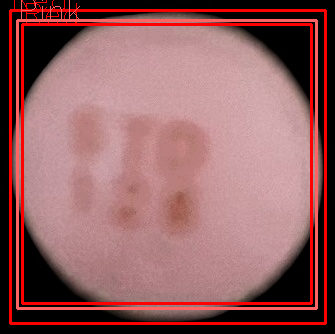

In [ ]:
# Step 5: Ëã•Ê≤íÊúâÊàêÂäüÂ∞çÊáâÂà∞Ëó•ÂìÅÁ∑®ËôüÂâáÈñãÂßãËæ®Ë≠òÈ°èËâ≤Ë∑üÂΩ¢ÁãÄ

# ËºâÂÖ•ÂúñÁâá
image = cv2.imread(rem_ori)
# image = cv2.imread("/content/drive/MyDrive/removed/IMG_7037.jpg")

# Â∞áÂúñÁâáËΩâÊèõÁÇ∫HSVËâ≤ÂΩ©Á©∫Èñì
hsvFrame = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# ÂÆöÁæ©‰∏çÂêåÈ°èËâ≤ÁöÑÁØÑÂúç‰∏¶Âª∫Á´ãÊé©ËÜúÔºàarrayÈ†ÜÂ∫èÔºöBGRÔºâ

pink_mask = cv2.inRange(hsvFrame, np.array([50, 50, 150], np.uint8), np.array([250, 250, 255], np.uint8))
red_mask = cv2.inRange(hsvFrame, np.array([0, 50, 50], np.uint8), np.array([10, 170, 200], np.uint8))

# ÈªÉËâ≤
yellow_mask = cv2.inRange(hsvFrame, np.array([15, 200, 200], np.uint8), np.array([30, 255, 255], np.uint8))

# ÈªëËâ≤
black_mask = cv2.inRange(hsvFrame, np.array([2, 2, 2], np.uint8), np.array([50, 50, 50], np.uint8))

# ÁôΩËâ≤
white_mask = cv2.inRange(hsvFrame, np.array([200, 200, 150], np.uint8), np.array([255, 255, 255], np.uint8))

# ÂÆöÁæ© kernel ‰∏¶ÊáâÁî®ÂΩ¢ÊÖãÂ≠∏Êìç‰Ωú
kernel = np.ones((5, 5), "uint8")

# Dilation Êìç‰Ωú
red_mask = cv2.dilate(red_mask, kernel)
pink_mask = cv2.dilate(pink_mask, kernel)
yellow_mask = cv2.dilate(yellow_mask, kernel)
black_mask = cv2.dilate(black_mask, kernel)
white_mask = cv2.dilate(white_mask, kernel)

# Bitwise_and ÈÅãÁÆó
res_red = cv2.bitwise_and(image, image, mask=red_mask)
res_pink = cv2.bitwise_and(image, image, mask=pink_mask)
res_yellow = cv2.bitwise_and(image, image, mask=yellow_mask)
res_black = cv2.bitwise_and(image, image, mask=black_mask)
res_white = cv2.bitwise_and(image, image, mask=white_mask)

# ÂÆöÁæ©È°èËâ≤Ëæ®Ë≠òÁöÑËº™Âªì‰∏¶ÂàóÂá∫‰∏ªÈ°èËâ≤
main_color = []
def detect_color(mask, color_name, image, box_color):
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 10000:
            main_color.append(color_name)
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image, (x, y), (x + w, y + h), box_color, 2)
            cv2.putText(image, color_name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, box_color)

# Ëæ®Ë≠òÈ°èËâ≤
detect_color(red_mask, "Red", image, (0, 0, 255))
detect_color(pink_mask, "Pink", image, (100, 100, 255))
detect_color(yellow_mask, "Yellow", image, (0, 255, 255))
detect_color(black_mask, "Black", image, (0, 165, 255))
detect_color(white_mask, "White", image, (255, 255, 255))

# È°ØÁ§∫ÁµêÊûú
cv2_imshow(image)



# Ëæ®Ë≠òÂΩ¢ÁãÄ

# ËºâÂÖ•Â∑≤ÂéªËÉåËôïÁêÜÈÅéÁöÑÂúñÁâáÔºàÂ∏∂ÈÄèÊòéËÉåÊôØÁöÑÂúñÂÉèÔºâ
image = cv2.imread(rem_ori, cv2.IMREAD_UNCHANGED)
# image = cv2.imread("/content/drive/MyDrive/removed/IMG_6934.jpg", cv2.IMREAD_UNCHANGED)

# Á¢∫‰øùÂúñÂÉèÊòØ RGB Êàñ RGBA Ê†ºÂºèÔºåÂ∞áÂÖ∂ËΩâÊèõÁÇ∫ÁÅ∞Èöé
if image.shape[2] == 4:  # Â¶ÇÊûúÊòØ RGBA
    # ÂøΩÁï•ÈÄèÊòéÈÄöÈÅìÔºåËΩâÊèõÁÇ∫ÁÅ∞Èöé
    gray = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)
else:
    # Â¶ÇÊûúÊòØ RGBÔºåÁõ¥Êé•ËΩâÊèõÁÇ∫ÁÅ∞Èöé
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# È´òÊñØÊ®°Á≥ä‰æÜÊ∏õÂ∞ëÈõúË®ä
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Â∞áÂúñÁâáËΩâÊèõÁÇ∫‰∫åÂÄºÂåñÂúñÂÉè
_, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# ÊâæÂá∫Ëº™Âªì
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# ÂÅáË®≠Âè™ÈúÄË¶ÅËæ®Ë≠òÊúÄÂ§ßÁöÑËº™Âªì
if contours:
    c = max(contours, key=cv2.contourArea)

    # Ë®àÁÆóÂë®Èï∑‰∏¶Ëøë‰ººÂ§öÈÇäÂΩ¢
    peri = cv2.arcLength(c, True)

    # Ë™øÊï¥ÈÄôÂÄãÂÄº‰æÜÊéßÂà∂Á≤æÂ∫¶
    approx = cv2.approxPolyDP(c, 0.0225 * peri, True)

    # Ë®àÁÆóÂ§ñÊé•Áü©ÂΩ¢ÁöÑÈï∑ÂØ¨ÊØî
    x, y, w, h = cv2.boundingRect(approx)
    aspect_ratio = w / float(h)

# Ëæ®Ë≠òÂΩ¢ÁãÄ
if len(approx) == 8:
    shape = "capsule"  # Ëæ®Ë≠òÂÖ´ÈÇäÂûã
elif 0.2 < aspect_ratio < 0.5:  # ‰∏ÄÂÄãÂêàÁêÜÁöÑËÜ†ÂõäÂΩ¢ÁãÄÈï∑ÂØ¨ÊØîÁØÑÂúç
    shape = "capsule"  # Ëæ®Ë≠òËÜ†ÂõäÂΩ¢ÁãÄ
elif len(approx) > 8:
    shape = "circle"  # Ëæ®Ë≠òÂúìÂΩ¢
else:
    shape = "unidentified"

In [ ]:
# Step 6: ÈÄèÈÅéËæ®Ë≠òÂá∫‰æÜÁöÑÈ°èËâ≤ÂíåÂΩ¢ÁãÄÂà§Êñ∑ÊòØÂê¶ÊúâÂ∞çÊáâËó•ÂìÅÔºåËã•ÊúâÂâáÁ®ãÂºèÁõ¥Êé•ÁµêÊùü
result = identify([], main_color, shape)


if result:
    print("Ëó•ÂìÅÂ≠∏ÂêçÔºö" + result[0] + "\nÈÅ©ÊáâÁóáÁãÄÔºö" + result[1] + "\nÊ≥®ÊÑè‰∫ãÈ†ÖÔºö" + result[2] + "\nÂâØ‰ΩúÁî®Ôºö" + result[3])
    # exit()

Ëó•ÂìÅÂ≠∏ÂêçÔºöMecobalamin
ÈÅ©ÊáâÁóáÁãÄÔºöÁ∂≠ÁîüÁ¥†B12„ÄÅÊîπÂñÑÊú´Ê¢¢ÊÄßÁ•ûÁ∂ìÈöúÁ§ô
Ê≥®ÊÑè‰∫ãÈ†ÖÔºöÂÆ§Ê∫´ÈÅøÂÖâ‰øùÂ≠ò
ÂâØ‰ΩúÁî®ÔºöÂé≠È£ü„ÄÅÂôÅÂøÉ„ÄÅÂòîÂêê„ÄÅ‰∏ãÁó¢Á≠âÁ≠âÔºå‰ª•‰∏äÂ§ßÁ¥Ñ(0.1%-5%) ÁôºÁîüÁéá„ÄÇ


In [ ]:
# Draw bounding boxes
import PIL
from PIL import ImageDraw

def draw_openocr_boxes(image_path, ocr_result, color='red', width=2):
    image = PIL.Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)
    try:
        json_result = json.loads(ocr_result[0].split("\t")[1])
        for item in json_result:
            box = item["points"]
            draw.line(box + [box[0]], fill=color, width=width)
    except Exception as e:
        print("‚ö†Ô∏è Áï´Ê°ÜÂ§±ÊïóÔºö", e)
    return image
boxed_image = draw_openocr_boxes(rem_ori, result)
boxed_image.show()


‚ö†Ô∏è Áï´Ê°ÜÂ§±ÊïóÔºö list index out of range
